# Project: TMDb Movies Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Dataset Description 
The table consists of 21 columns and 10886 rows of data.

The columns are as follow:

id - column index 

imdb_id - specific id for each movie on The Movie Database 

popularity - approval rating for each movie 

budget - how much was invested into the movie production 

revenue - how much was profit was made from the movie after release 

original_title - title of the movie 

cast - name of actors and actresses who acted the movie 

homepage - website address 

director - name of director 

tagline -  slogan for advertisement 

keywords - words used in searching for the movie 

overview - a brief summary of the movie 

runtime - total time length of the movie 

genres - the type or category of a movie 

production_companies - the company which produced the content 

release_date - the date the movie was premiered 

vote_count - number of people who rated the movie 

vote_average - average rating of the movie 

release_year - the year the movie was released 

budget_adj - budget amount accounting for inflation 

revenue_adj - revenue amount accounting for inflation 



### Question(s) for Analysis
Which genres are most popular from year to year? 

What kinds of properties are associated with movies that have high revenues? 


Installation of packages that will be needed in the data analysis process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
import pandas as pd
df = pd.read_csv('tmdb-movies.csv')
df.head()


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Loading the data into the workspace

In [4]:
df.shape

(10866, 21)

Inspecting the data to figure out data cleaning processes that will be needed.

In [5]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

Above is the summary of the descriptive statistics for the data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There are missing values in the cast, homepage, director, tagline, keywords, overview, genre and production companies columns. 
There is need to remove some columns since we're not going to be analysing them. E.g., imdb_id, original_title, homepage, tagline, keywords, overview, and release_date and production_companies (release_year is better for the analysis).

In [7]:
df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'production_companies'], axis=1, inplace = True)

In [8]:
df.head()

popularity     budget     revenue  \
0   32.985763  150000000  1513528810   
1   28.419936  150000000   378436354   
2   13.112507  110000000   295238201   
3   11.173104  200000000  2068178225   
4    9.335014  190000000  1506249360   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  vote_count  \
0      124  Action|Adventure|Science Fiction|Thriller        5562   
1      120  Action|Adventure|Science Fiction|Thriller        6185   
2      119         Adventure|Science Fiction|Thriller        2480   
3      136   Action|Adventure|Science Fiction|Fantasy        5292   
4      137                      Action|Crime|Thriller        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

All the columns which are not useful to the analysis have been removed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
cast            10790 non-null object
director        10822 non-null object
runtime         10866 non-null int64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


Now, we are left with 12 columns. 


### Data Cleaning

In [10]:
df['genres'] = df['genres'].str.split('|', expand=True)
df['cast'] = df['cast'].str.split('|', expand=True)
df.head()

popularity     budget     revenue              cast          director  \
0   32.985763  150000000  1513528810       Chris Pratt   Colin Trevorrow   
1   28.419936  150000000   378436354         Tom Hardy     George Miller   
2   13.112507  110000000   295238201  Shailene Woodley  Robert Schwentke   
3   11.173104  200000000  2068178225     Harrison Ford       J.J. Abrams   
4    9.335014  190000000  1506249360        Vin Diesel         James Wan   

   runtime     genres  vote_count  vote_average  release_year    budget_adj  \
0      124     Action        5562           6.5          2015  1.379999e+08   
1      120     Action        6185           7.1          2015  1.379999e+08   
2      119  Adventure        2480           6.3          2015  1.012000e+08   
3      136     Action        5292           7.5          2015  1.839999e+08   
4      137     Action        2947           7.3          2015  1.747999e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08  
3  1.902723e+09  
4  1.385749e+09

Most of the other data cleaning steps have been executed under wrangling except the splitting of the "genres" column by the delimiter "|". The first value for each row only was returned. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which genres are most popular from year to year?)

In [11]:
def graphplot (x1, x2): 
    y = df.groupby(x1)[x2].mean().plot(kind= 'bar')
    df.sort_values(by=(x1), ascending= False, inplace= True)
    return y

Text(0,0.5,'popularity')

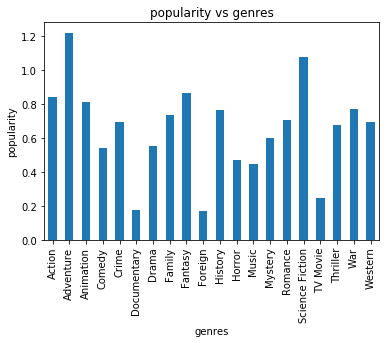

In [12]:
genre_vs_popularity = graphplot ('genres', 'popularity')
plt.title('popularity vs genres')
plt.xlabel('genres')
plt.ylabel('popularity')

Each bar represents a unique genre of movie. And from the plot, it is clear that Adventure and Sci-Fi are the two most popular movie genres.

Text(0,0.5,'vote_count')

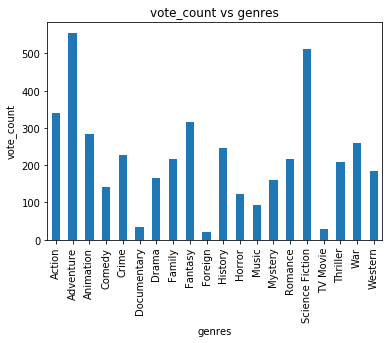

In [13]:
genre_vs_vote_count = graphplot ('genres', 'vote_count')
plt.title('vote_count vs genres')
plt.xlabel('genres')
plt.ylabel('vote_count')

When we analyse with vote_count, it still follows Adventure and Sci-Fi are the two most popular movie genres.

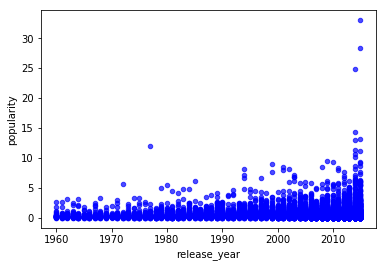

In [14]:
df.plot.scatter(x='release_year', y = 'popularity', c = 'blue', alpha = 0.7)

This follows that Advnture and Sci-Fi movies released in the 2000s are the most popular genres of movies.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [15]:
df.sort_values(by='revenue', ascending= False, inplace= True)
df.head()

popularity     budget     revenue               cast         director  \
1386    9.432768  237000000  2781505847    Sam Worthington    James Cameron   
3      11.173104  200000000  2068178225      Harrison Ford      J.J. Abrams   
5231    4.355219  200000000  1845034188       Kate Winslet    James Cameron   
4361    7.637767  220000000  1519557910  Robert Downey Jr.      Joss Whedon   
0      32.985763  150000000  1513528810        Chris Pratt  Colin Trevorrow   

      runtime           genres  vote_count  vote_average  release_year  \
1386      162           Action        8458           7.1          2009   
3         136           Action        5292           7.5          2015   
5231      194            Drama        4654           7.3          1997   
4361      143  Science Fiction        8903           7.3          2012   
0         124           Action        5562           6.5          2015   

        budget_adj   revenue_adj  
1386  2.408869e+08  2.827124e+09  
3     1.839999e+08  1.902723e+09  
5231  2.716921e+08  2.506406e+09  
4361  2.089437e+08  1.443191e+09  
0     1.379999e+08  1.392446e+09

In order to get the highest revenues, we need to sort in descending order.

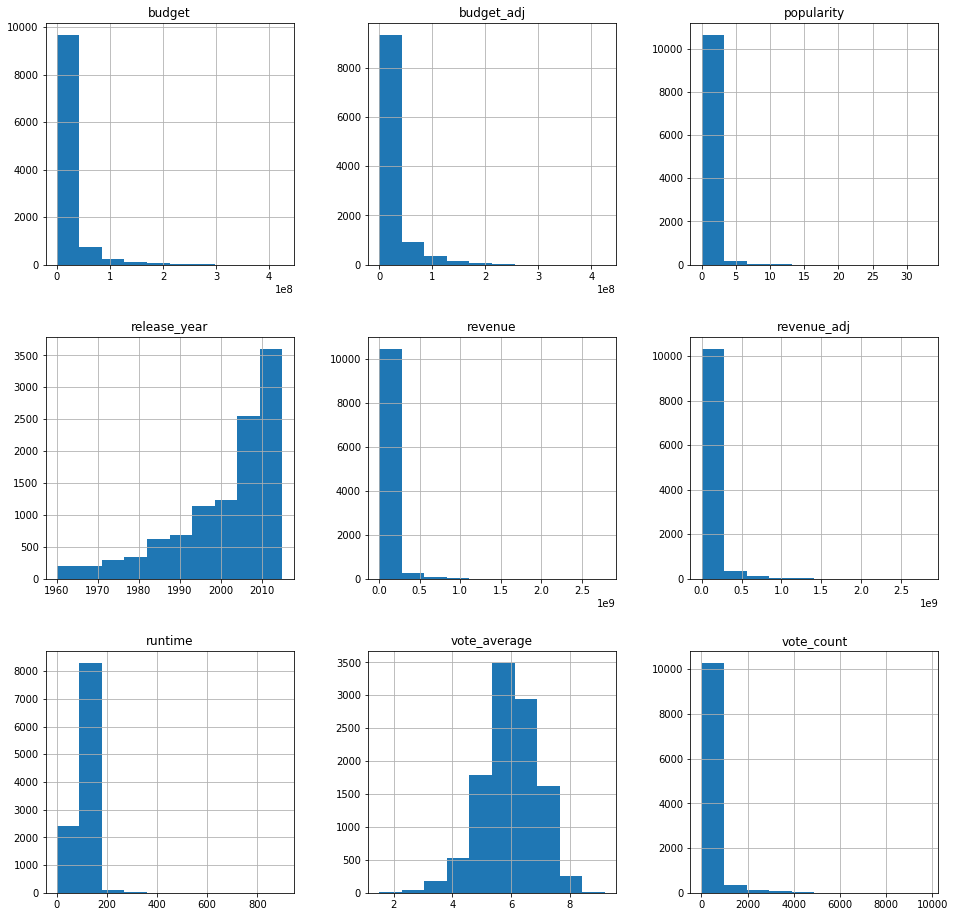

In [16]:
df.hist(figsize = (16,16));

From the visualisation, we will see that revenue is right skewed, so it follows that all the other properties whose historams are also right skewed (budget, budget_adj, popularity, revenue_adj, runtime and vote_count) are properties associated with movies with high revenues.

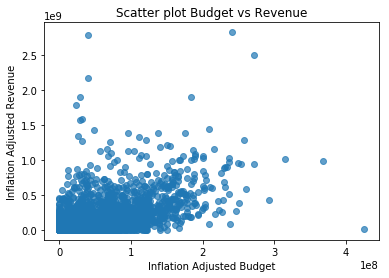

In [17]:
x = df["budget_adj"]
y = df["revenue_adj"]
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Inflation Adjusted Budget")
plt.ylabel("Inflation Adjusted Revenue")
plt.title("Scatter plot Budget vs Revenue", fontsize=12)
plt.show()

This shows a positive correlation between budget and revenue. This means that increase in budget results in increase in revenue. However, correlation doesn't imply causation as other factors such as genre, popularity, cast, etc could be responsible .

In [18]:
df["budget_adj"].corr(df['revenue_adj'])

0.6466074410608977

<a id='limitations'></a>
## Limitations

The exploration was based on the first word in the delimited "genres" column. This was done to simplify the visualisations. The other elements in the column were discarded.

<a id='conclusions'></a>
## Conclusions

From the data, we have seen that Action and Sci-Fi movies are the most popular over the years. This attributes for the high amount of revenue generated by these movie genres through the years.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0